In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [6]:
df = pd.read_csv("original_file.csv") 
df.head(10)


,IMAGE,FIX_INDEX,FIX_DURATION,FIX_X,FIX_Y,FIX_PUPIL,source_file,numeric_id,label,image_id
0,outman_054.jpg,1,205,518.5,371.3,1177,000.xlsx,0,0,53
1,outman_054.jpg,2,90,275.1,282.2,1262,000.xlsx,0,0,53
2,outman_054.jpg,3,305,600.3,271.1,1265,000.xlsx,0,0,53
3,outman_054.jpg,4,269,635.2,269.2,1326,000.xlsx,0,0,53
4,outman_054.jpg,5,318,597.3,266.0,1366,000.xlsx,0,0,53
5,outman_054.jpg,6,585,575.4,269.3,1442,000.xlsx,0,0,53
6,outman_054.jpg,7,531,610.9,274.1,1508,000.xlsx,0,0,53
7,outman_054.jpg,8,336,595.0,333.7,1577,000.xlsx,0,0,53
8,outman_054.jpg,9,400,597.8,599.6,1687,000.xlsx,0,0,53
9,outman_054.jpg,10,325,550.1,580.0,1756,000.xlsx,0,0,53


In [7]:
df.describe()

,FIX_INDEX,FIX_DURATION,FIX_X,FIX_Y,FIX_PUPIL,numeric_id,label,image_id
count,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000
mean,8.191451,291.955667,514.751147,395.808575,1253.202497,142.763834,0.460364,49.630563
std,4.896017,258.334214,198.603991,145.309891,637.554366,105.218982,0.498428,29.045198
min,1.000000,0.000000,-1001.000000,-734.000000,189.000000,0.000000,0.000000,0.000000
25%,4.000000,171.000000,391.500000,299.200000,781.000000,44.000000,0.000000,24.000000
50%,8.000000,242.000000,514.900000,389.400000,1149.000000,94.000000,0.000000,49.000000
75%,12.000000,344.000000,641.000000,487.000000,1622.000000,248.000000,1.000000,75.000000
max,39.000000,5001.000000,2034.600000,1484.700000,4141.000000,303.000000,1.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225159 entries, 0 to 225158
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IMAGE         225159 non-null  object 
 1   FIX_INDEX     225159 non-null  int64  
 2   FIX_DURATION  225159 non-null  int64  
 3   FIX_X         225159 non-null  float64
 4   FIX_Y         225159 non-null  float64
 5   FIX_PUPIL     225159 non-null  int64  
 6   source_file   225159 non-null  object 
 7   numeric_id    225159 non-null  int64  
 8   label         225159 non-null  int64  
 9   image_id      225159 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 17.2+ MB


array([[<Axes: title={'center': 'FIX_INDEX'}>,
        <Axes: title={'center': 'FIX_DURATION'}>,
        <Axes: title={'center': 'FIX_X'}>],
       [<Axes: title={'center': 'FIX_Y'}>,
        <Axes: title={'center': 'FIX_PUPIL'}>,
        <Axes: title={'center': 'numeric_id'}>],
       [<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'image_id'}>, <Axes: >]], dtype=object)

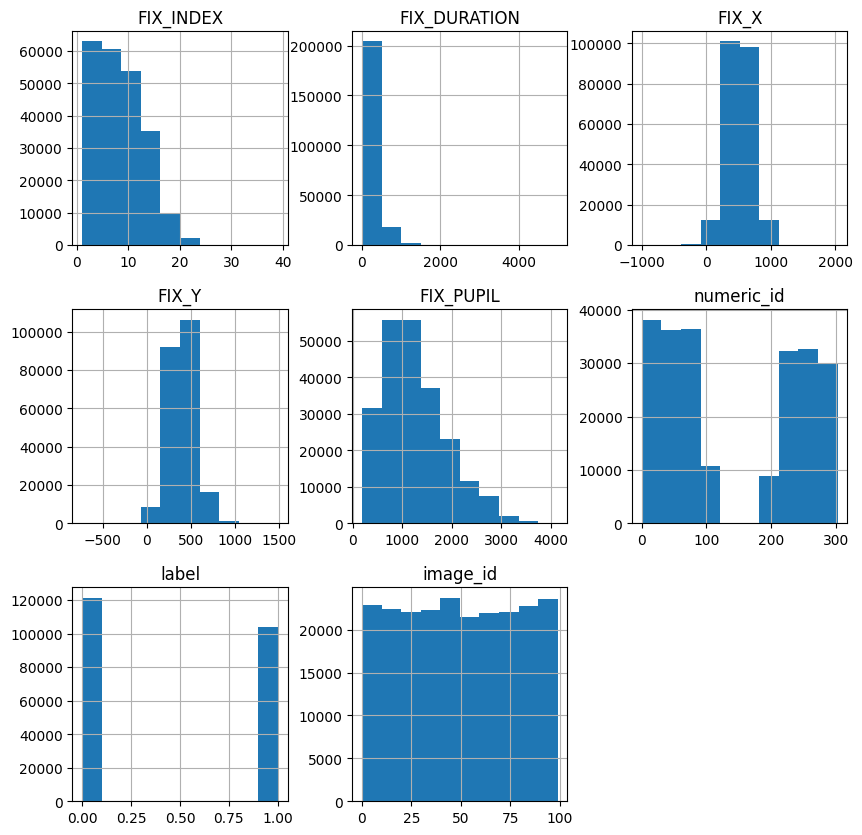

In [9]:
df.hist(figsize=(10, 10))  


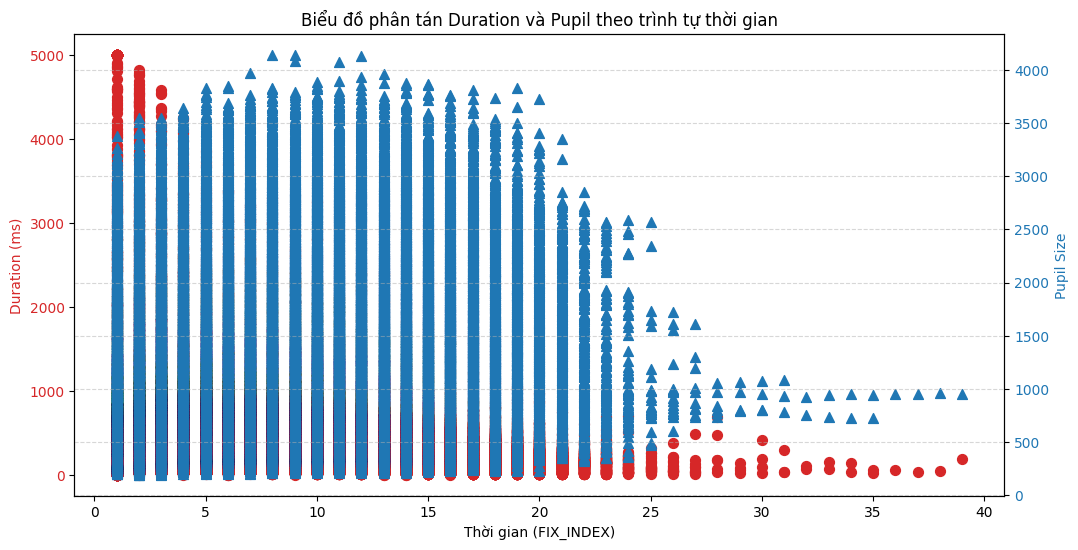

In [12]:
# Tạo figure và trục chính (ax1)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục X chung là FIX_INDEX
x = df['FIX_INDEX']

# Vẽ FIX_DURATION lên trục trái (ax1) - Màu đỏ
ax1.scatter(x, df['FIX_DURATION'], color='tab:red', label='Duration', s=50)
ax1.set_xlabel('Thời gian (FIX_INDEX)')
ax1.set_ylabel('Duration (ms)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Tạo trục phụ (ax2) chia sẻ trục X với ax1
ax2 = ax1.twinx() 

# Vẽ FIX_PUPIL lên trục phải (ax2) - Màu xanh
ax2.scatter(x, df['FIX_PUPIL'], color='tab:blue', label='Pupil', marker='^', s=50) # Dùng hình tam giác
ax2.set_ylabel('Pupil Size', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Biểu đồ phân tán Duration và Pupil theo trình tự thời gian')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Vẽ Duration vs Pupil (Màu sắc thể hiện Thời gian)
### Cách này giúp bạn xem mối tương quan giữa độ giãn đồng tử và thời gian nhìn, trong đó 
### màu sắc của các điểm sẽ thay đổi từ nhạt sang đậm (hoặc đổi màu) theo FIX_INDEX.

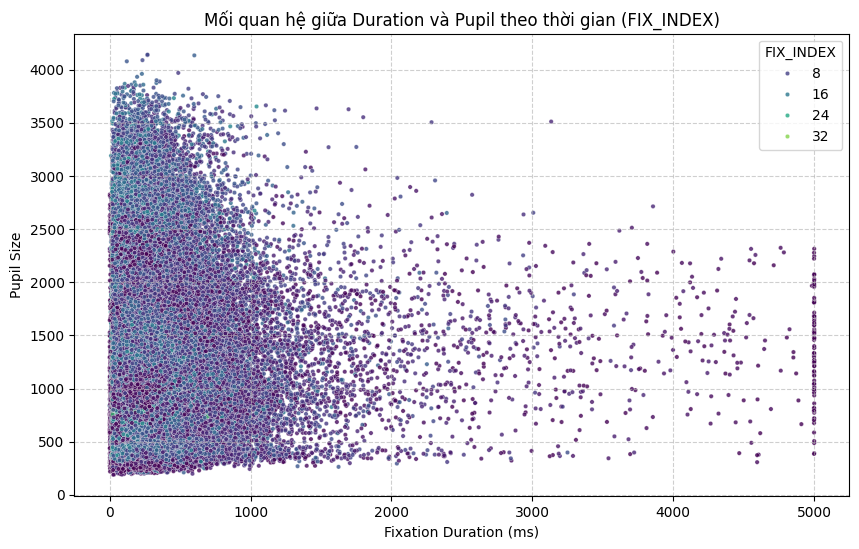

In [15]:


plt.figure(figsize=(10, 6))

# Vẽ scatter plot
sns.scatterplot(
    data=df, 
    x='FIX_DURATION', 
    y='FIX_PUPIL', 
    hue='FIX_INDEX',    
    palette='viridis',  
    s=10,              
    alpha=0.8          
)

plt.title('Mối quan hệ giữa Duration và Pupil theo thời gian (FIX_INDEX)')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Pupil Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Axes: >

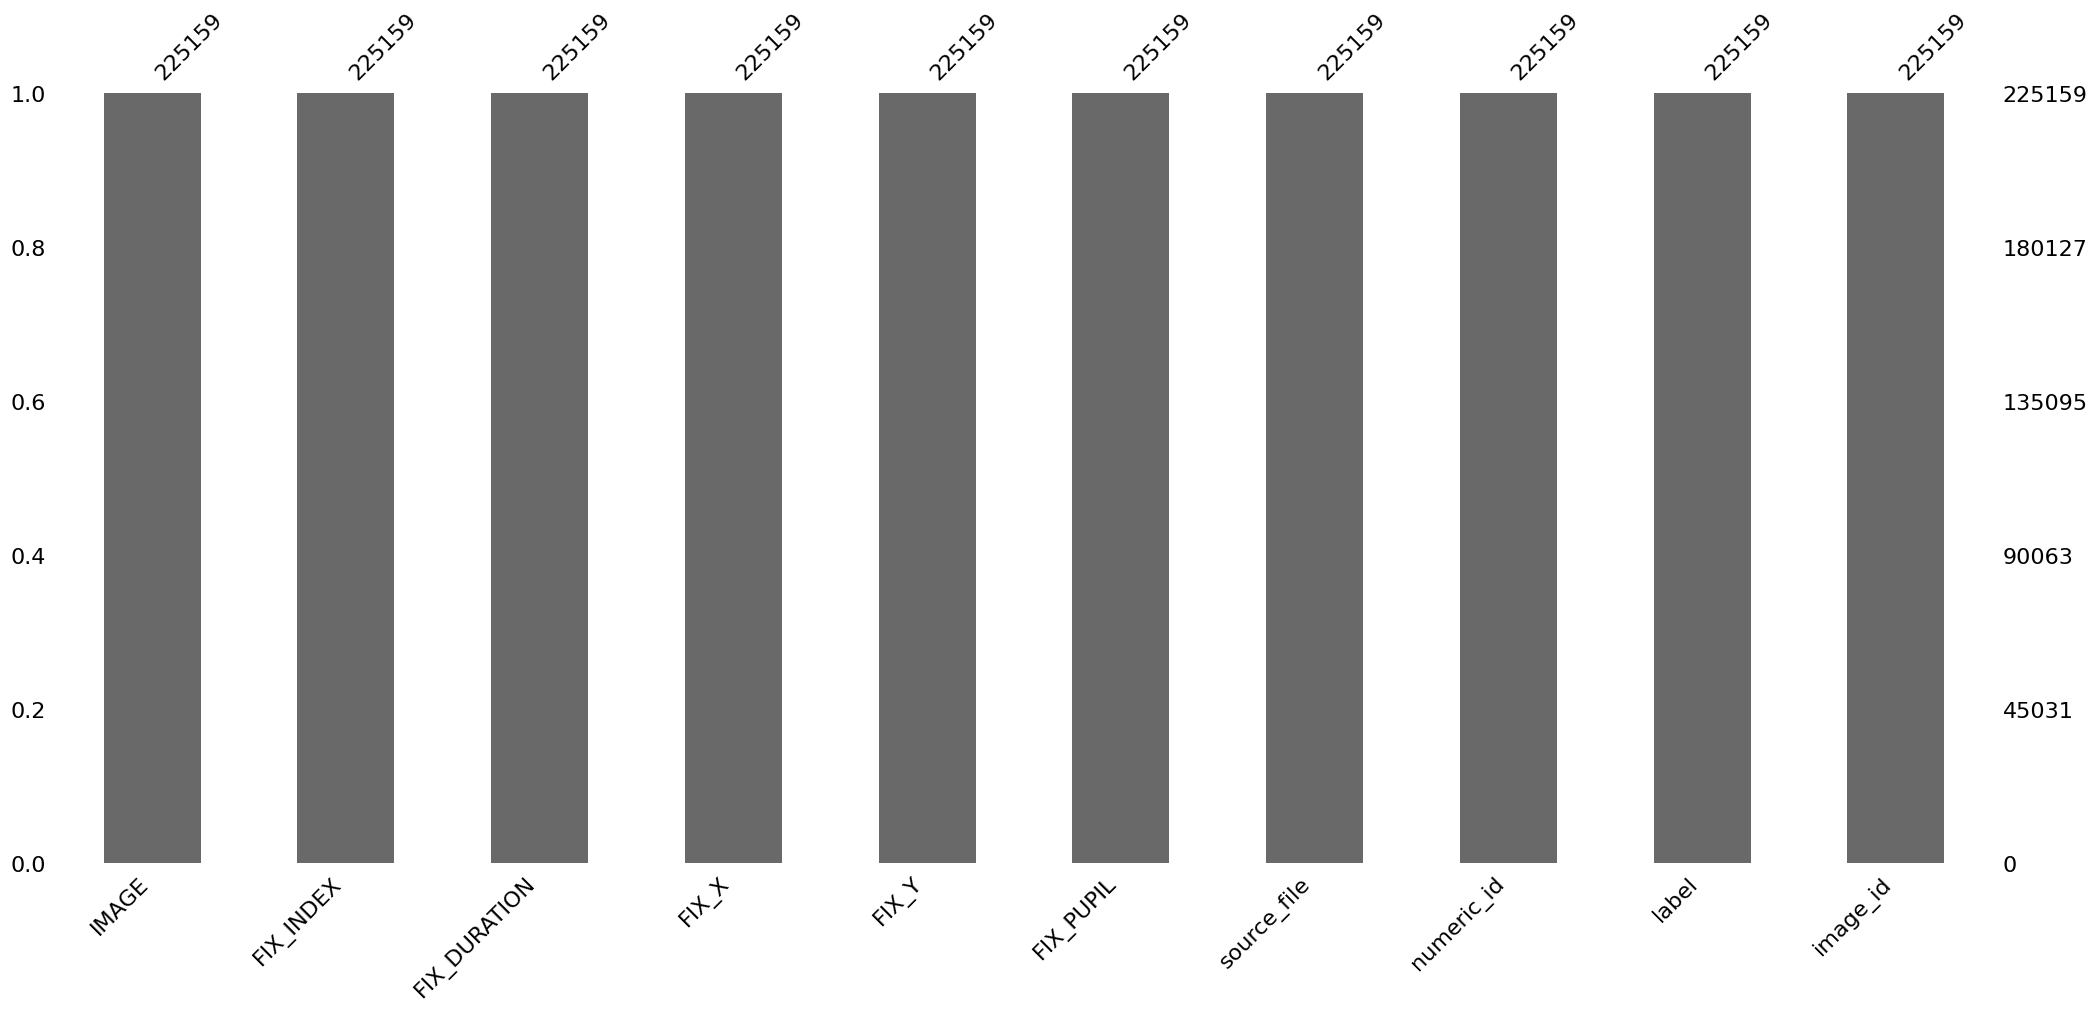

In [16]:
import missingno as msno
msno.bar(df)



### Không có dữ liệu missing